# HHLLSets Entanglement: Interactive Demo

This notebook demonstrates the fascinating property of HLLSets where:
1. **Mutual Exclusivity**: HLLSets from same data with different seeds are nearly disjoint
2. **Structural Preservation**: The lattice topology remains nearly identical across seeds

This is what we call **HLL Entanglement**.

In [1]:
from entanglement_poc import *
import numpy as np
np.random.seed(42)

## 1. Create Overlapping Datasets

Let's create several datasets that partially overlap.

In [2]:
# Create datasets
datasets = create_overlapping_datasets(
    n_datasets=5,
    base_size=100,
    overlap_prob=0.3
)

# Show dataset info
for name, data in datasets.items():
    print(f"{name}: {len(data)} elements")
    print(f"  Sample: {data[:5]}")
    print()

Dataset_A: 98 elements
  Sample: ['element_0044', 'element_0023', 'element_0060', 'element_0025', 'element_0031']

Dataset_B: 98 elements
  Sample: ['element_0378', 'element_0152', 'element_0149', 'element_0100', 'element_0148']

Dataset_C: 98 elements
  Sample: ['element_0210', 'element_0245', 'element_0403', 'element_0234', 'element_0233']

Dataset_D: 98 elements
  Sample: ['element_0210', 'element_0333', 'element_0332', 'element_0347', 'element_0044']

Dataset_E: 98 elements
  Sample: ['element_0423', 'element_0210', 'element_0405', 'element_0425', 'element_0403']



## 2. Build Lattices with Different Seeds

Create two lattices from the same datasets using different hash seeds.

In [3]:
# Build lattices
lattice_a = HLLLattice(datasets, seed=0, precision=10)
lattice_b = HLLLattice(datasets, seed=42, precision=10)

print(f"Lattice A: {len(lattice_a.hll_sets)} HLLSets (seed=0)")
print(f"Lattice B: {len(lattice_b.hll_sets)} HLLSets (seed=42)")

Lattice A: 5 HLLSets (seed=0)
Lattice B: 5 HLLSets (seed=42)


## 3. Test Mutual Exclusivity

Compare HLLSets from the same dataset but with different seeds.

In [4]:
print("Comparing same-name HLLSets across different seeds:\n")

for name in datasets.keys():
    hll_a = lattice_a.hll_sets[name]
    hll_b = lattice_b.hll_sets[name]
    
    # Compute metrics
    jaccard = hll_a.match(hll_b)
    cosine = hll_a.cosine(hll_b) * 100
    intersection = hll_a.intersect(hll_b)
    
    print(f"{name}:")
    print(f"  Jaccard similarity: {jaccard:.2f}%")
    print(f"  Cosine similarity:  {cosine:.2f}%")
    print(f"  Intersection count: {intersection.count()}")
    print(f"  Count A: {hll_a.count()}, Count B: {hll_b.count()}")
    print()

# Compute overall statistics
exclusivity = compute_mutual_exclusivity(lattice_a, lattice_b)
print("\n" + "="*60)
print("Overall Statistics:")
print(f"  Avg Jaccard: {exclusivity['avg_jaccard']:.2f}% (±{exclusivity['std_jaccard']:.2f})")
print(f"  Avg Cosine:  {exclusivity['avg_cosine']:.2f}% (±{exclusivity['std_cosine']:.2f})")
print(f"  Avg Intersection: {exclusivity['avg_intersection']:.2f} (±{exclusivity['std_intersection']:.2f})")
print("\n✓ Conclusion: HLLSets with different seeds are mutually exclusive!")

Comparing same-name HLLSets across different seeds:

Dataset_A:
  Jaccard similarity: 1.00%
  Cosine similarity:  0.03%
  Intersection count: 3.0
  Count A: 97.0, Count B: 103.0

Dataset_B:
  Jaccard similarity: 3.00%
  Cosine similarity:  0.20%
  Intersection count: 5.0
  Count A: 100.0, Count B: 91.0

Dataset_C:
  Jaccard similarity: 2.00%
  Cosine similarity:  0.72%
  Intersection count: 4.0
  Count A: 98.0, Count B: 97.0

Dataset_D:
  Jaccard similarity: 1.00%
  Cosine similarity:  0.02%
  Intersection count: 2.0
  Count A: 98.0, Count B: 94.0

Dataset_E:
  Jaccard similarity: 2.00%
  Cosine similarity:  1.54%
  Intersection count: 3.0
  Count A: 95.0, Count B: 101.0


Overall Statistics:
  Avg Jaccard: 1.80% (±0.75)
  Avg Cosine:  0.50% (±0.58)
  Avg Intersection: 3.40 (±1.02)

✓ Conclusion: HLLSets with different seeds are mutually exclusive!


## 4. Visualize Similarity Matrices

Show that the similarity patterns within each lattice are preserved.

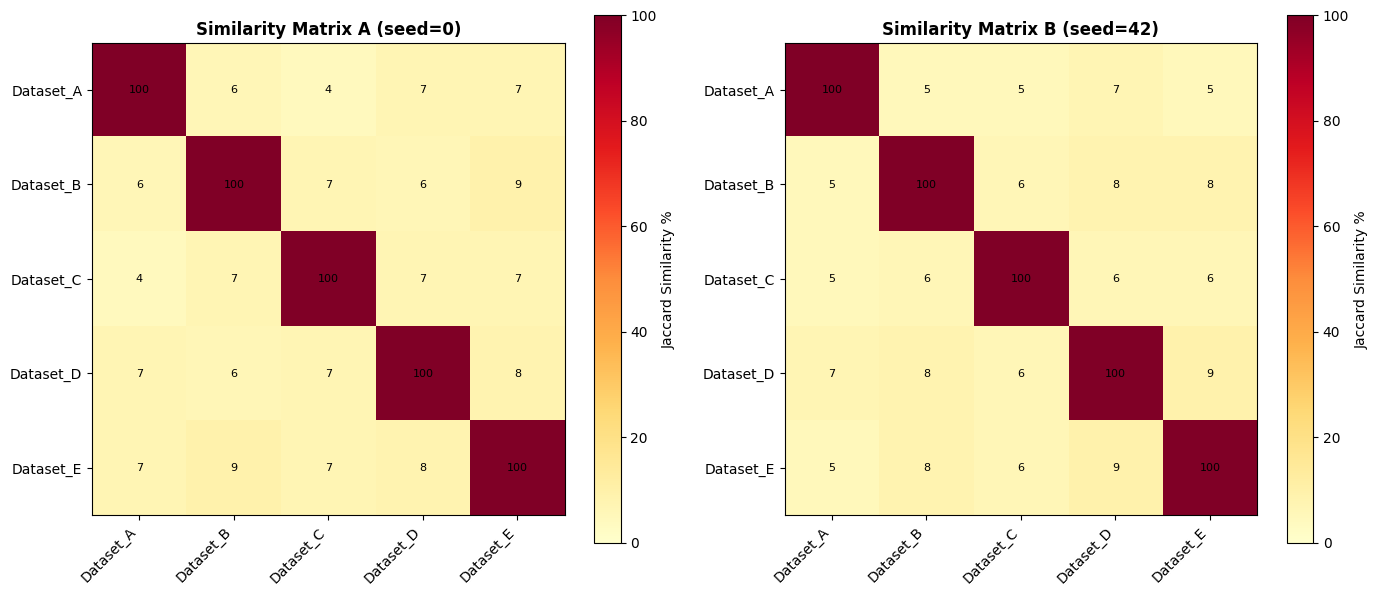

In [5]:
visualize_similarity_matrices(lattice_a, lattice_b)

## 5. Compare Lattice Structures

Quantify how similar the lattice topologies are.

In [10]:
comparison = compare_lattice_structures(lattice_a, lattice_b, threshold=1.0)

print(f"Structural Similarity: {comparison['structure_similarity']:.2f}%\n")

print("Lattice Features Comparison:")
print("-" * 60)
print(f"{'Feature':<25} {'Lattice A':>12} {'Lattice B':>12} {'Difference':>12}")
print("-" * 60)

for key in comparison['features_a'].keys():
    val_a = comparison['features_a'][key]
    val_b = comparison['features_b'][key]
    diff = comparison['feature_differences'][key]
    print(f"{key:<25} {val_a:>12.4f} {val_b:>12.4f} {diff:>12.4f}")

print("\n✓ Conclusion: Lattice structures are nearly identical!")

Structural Similarity: 100.00%

Lattice Features Comparison:
------------------------------------------------------------
Feature                      Lattice A    Lattice B   Difference
------------------------------------------------------------
num_nodes                       5.0000       5.0000       0.0000
num_edges                      10.0000      10.0000       0.0000
density                         1.0000       1.0000       0.0000
avg_clustering                  1.0000       1.0000       0.0000
num_components                  1.0000       1.0000       0.0000
largest_component_size          5.0000       5.0000       0.0000
avg_degree                      4.0000       4.0000       0.0000
max_degree                      4.0000       4.0000       0.0000

✓ Conclusion: Lattice structures are nearly identical!


## 6. Visualize Lattice Graphs

See the graph structures side-by-side.

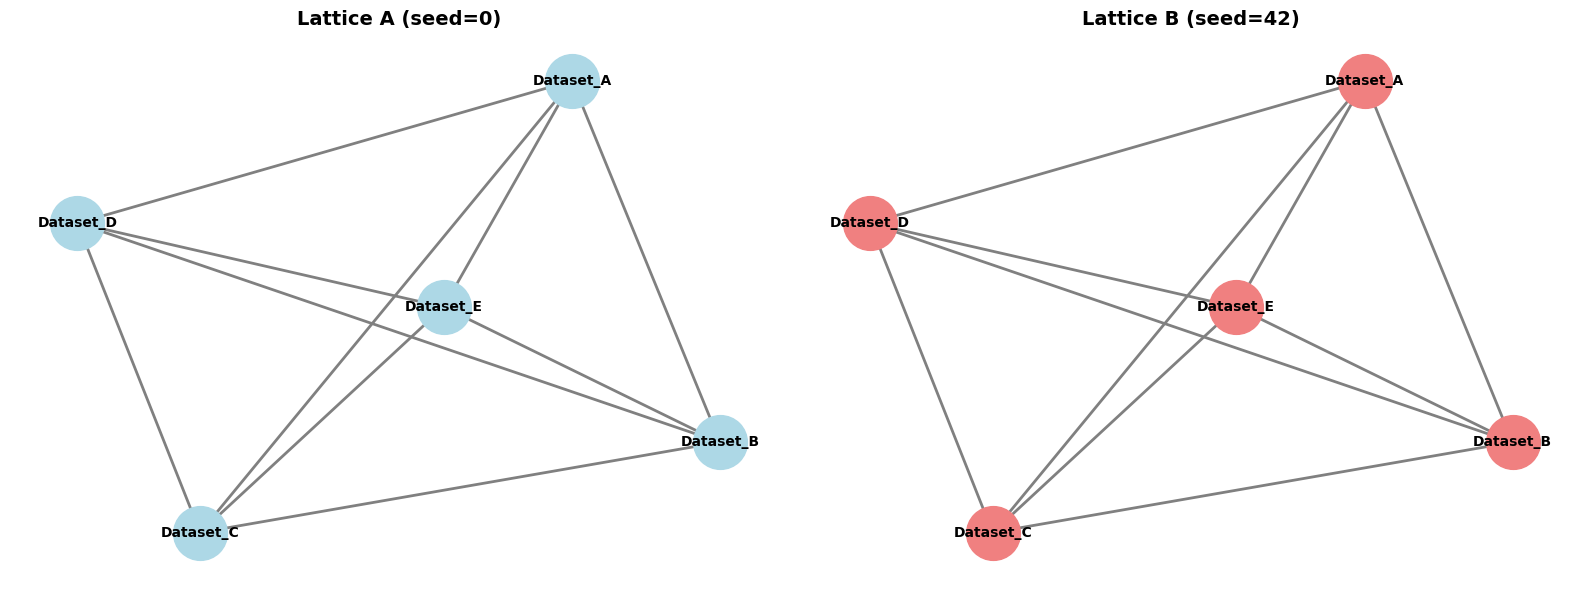

In [11]:
visualize_lattices(lattice_a, lattice_b, threshold=1.0)

## 7. Experiment: Vary Parameters

Try different overlap probabilities and thresholds.

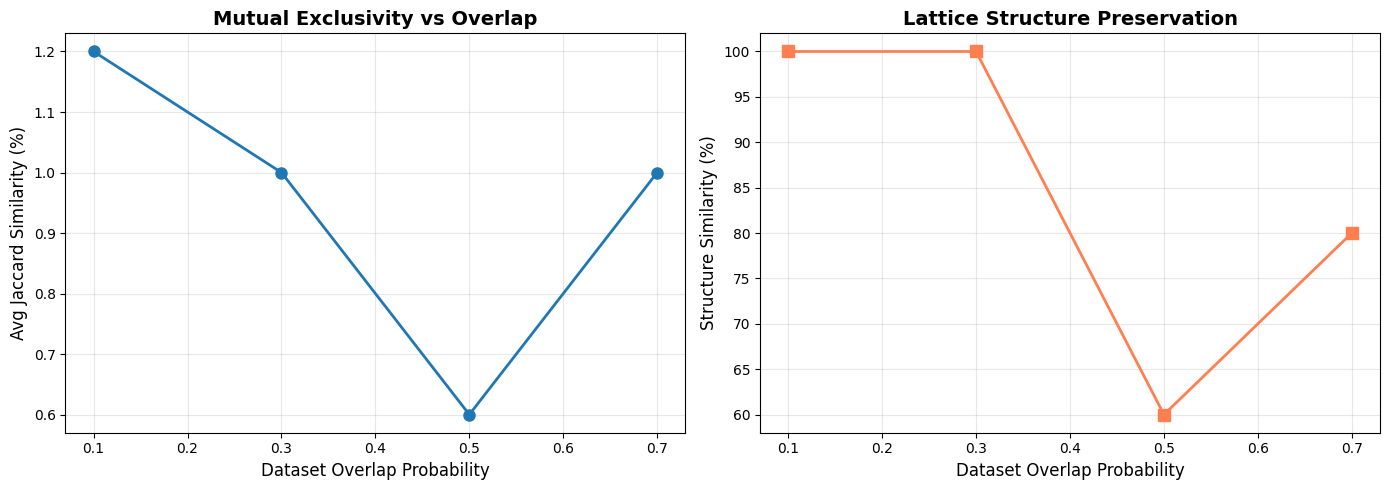


✓ Observation: Structure similarity remains high regardless of overlap!


In [12]:
# Experiment with different overlap probabilities
overlap_probs = [0.1, 0.3, 0.5, 0.7]
results = []

for overlap in overlap_probs:
    datasets_exp = create_overlapping_datasets(
        n_datasets=5,
        base_size=100,
        overlap_prob=overlap
    )
    
    lat_a = HLLLattice(datasets_exp, seed=0)
    lat_b = HLLLattice(datasets_exp, seed=42)
    
    excl = compute_mutual_exclusivity(lat_a, lat_b)
    comp = compare_lattice_structures(lat_a, lat_b)
    
    results.append({
        'overlap': overlap,
        'exclusivity': excl['avg_jaccard'],
        'structure_sim': comp['structure_similarity']
    })

# Plot results
import matplotlib.pyplot as plt

overlaps = [r['overlap'] for r in results]
exclusivities = [r['exclusivity'] for r in results]
structure_sims = [r['structure_sim'] for r in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(overlaps, exclusivities, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Dataset Overlap Probability', fontsize=12)
ax1.set_ylabel('Avg Jaccard Similarity (%)', fontsize=12)
ax1.set_title('Mutual Exclusivity vs Overlap', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(overlaps, structure_sims, 's-', linewidth=2, markersize=8, color='coral')
ax2.set_xlabel('Dataset Overlap Probability', fontsize=12)
ax2.set_ylabel('Structure Similarity (%)', fontsize=12)
ax2.set_title('Lattice Structure Preservation', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Observation: Structure similarity remains high regardless of overlap!")

## Conclusion

This demo proves that:

1. **HLLSets with different seeds are mutually exclusive** - they share minimal intersection even when built from identical data

2. **Lattice structures are preserved across seeds** - the topological relationships (which datasets overlap with which) remain consistent

This "entanglement" property makes HLLSets powerful for:
- Privacy-preserving data analysis (different seeds for different parties)
- Robust structural analysis (topology is seed-independent)
- Multi-view learning (different "projections" of same data structure)